## Feature Engineering: Transformation

In [3]:
import pandas as pd

dataset = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
dataset.columns = ['label', 'body']

In [4]:
import string

def punct_percentage(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/ (len(text) - text.count(" ")), 3) * 100

dataset['punct%'] = dataset['body'].apply(lambda x: punct_percentage(x))
dataset['body_len'] = dataset['body'].apply(lambda x: len(x) - x.count(" "))
dataset.head()


,label,body,punct%,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4.7,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",4.1,49
2,ham,Even my brother is not like to speak with me. ...,3.2,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,7.1,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,4.4,135


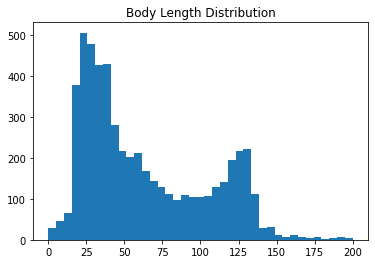

In [5]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 200, 40)
pyplot.hist(dataset['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

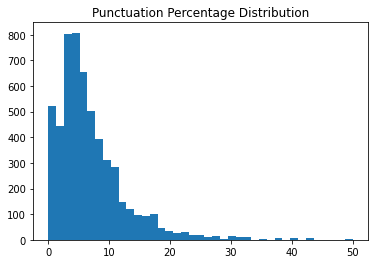

In [6]:
bins = np.linspace(0, 50, 40)
pyplot.hist(dataset['punct%'], bins)
pyplot.title('Punctuation Percentage Distribution')
pyplot.show()

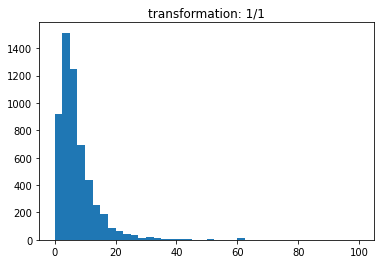

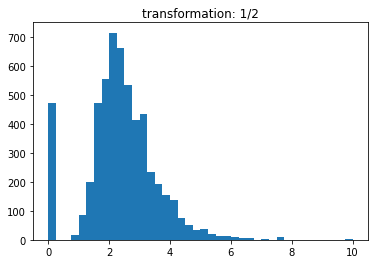

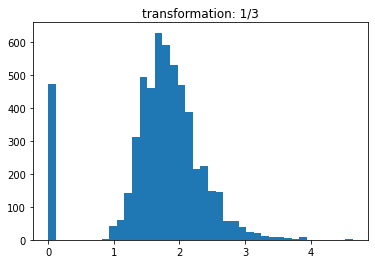

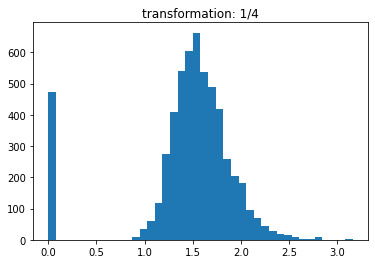

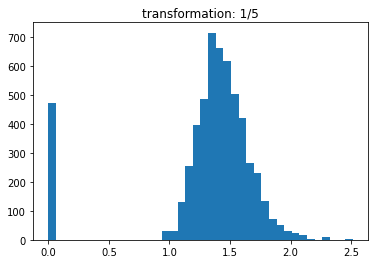

In [8]:
for i in range(1, 6):
  pyplot.hist((dataset['punct%'])** (1/i), bins=40)
  pyplot.title('transformation: 1/{}'.format(str(i)))
  pyplot.show()

In [9]:
print(dataset['punct%'])

0        4.7
1        4.1
2        3.2
3        7.1
4        4.4
        ... 
5562     6.1
5563     3.4
5564    14.6
5565     1.0
5566     4.8
Name: punct%, Length: 5567, dtype: float64
